First 5 Rows:
   Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  obje

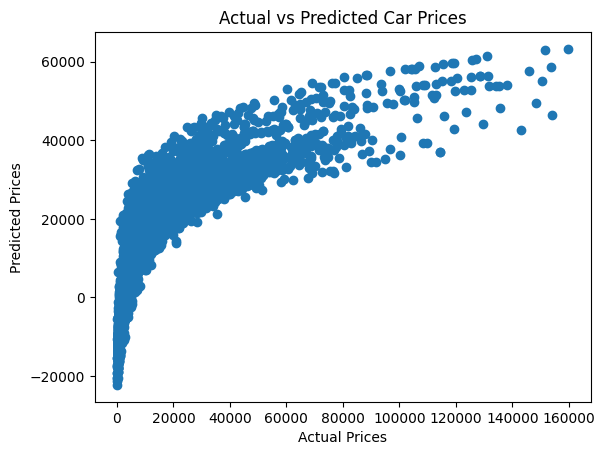

In [2]:
# CodeAlpha Data Science Internship
# Task: Car Price Prediction using Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('/content/car_sales_data.csv')

print("First 5 Rows:\n", data.head())
print("\nDataset Info:\n")
print(data.info())
data = data.dropna()
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

X = data.drop('Price', axis=1)
y = data['Price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

# Visualization (Actual vs Predicted)
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()
